# Ward

This notebook illustrates the hierarchical clustering of graphs by the [Ward method](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html), based on the spectral embedding of the graph.

In [1]:
import numpy as np
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

import networkx as nx
import sknetwork as skn

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.data.karate_club()

**Clustering**

In [4]:
spectral_ward = skn.hierarchy.SpectralWard()

In [5]:
dendrogram = spectral_ward.fit_transform(adjacency)

SpectralWard(embedding_dimension=16, l2normalization=True)

**Visualization**

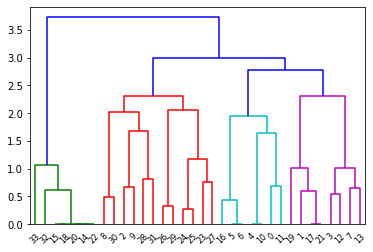

In [7]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [8]:
# default = 2 clusters
labels = skn.hierarchy.straight_cut(dendrogram)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]


In [9]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1] [27  7]


In [10]:
# cut with 4 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
print(labels)

[3 1 0 1 3 3 3 1 0 0 3 3 1 1 2 2 3 1 2 1 2 1 2 0 0 0 0 0 0 0 0 0 2 2]


In [11]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12  8  7  7]


**Visualization**

In [12]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


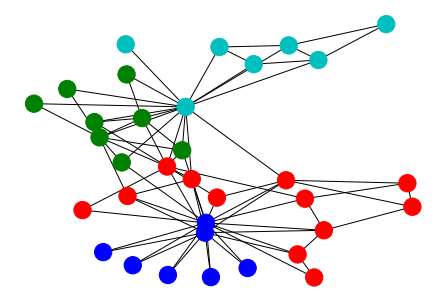

In [13]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [14]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.5663650075414781

In [15]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4240664188497839

**Parameters**

In [16]:
spectral_ward = skn.hierarchy.SpectralWard(embedding_dimension = 10)
spectral_ward.fit(adjacency)

SpectralWard(embedding_dimension=10, l2normalization=True)

## Directed graphs

**Loading**

In [20]:
adjacency, names = skn.data.painters(return_labels=True)

**Clustering**

In [23]:
# treat directed graph as bipartite graph
bispectral_ward = skn.hierarchy.BiSpectralWard(embedding_dimension=10)

In [24]:
bispectral_ward.fit(adjacency)

BiSpectralWard(embedding_dimension=10, l2normalization=True, col_clustering=True, co_clustering=False)

In [26]:
# take hierarchy of rows
dendrogram = bispectral_ward.row_dendrogram_

**Visualization**

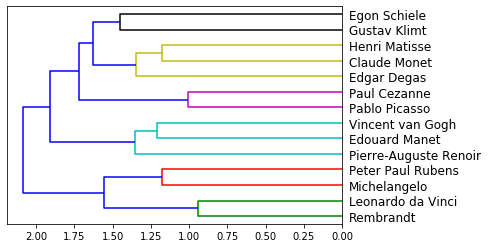

In [27]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram, labels = list(names.values()), orientation = 'left')

**Cuts of the dendrogram**

In [28]:
# cut with 3 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 2 1 1 0 0 2 1 0 0 2 0]


In [29]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2] [7 4 3]


**Visualization**

In [30]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


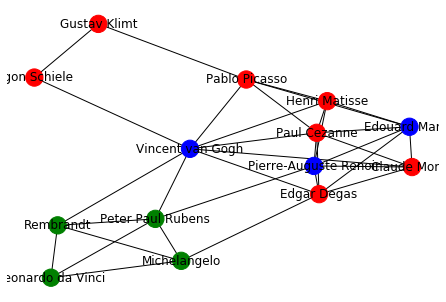

In [31]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels = names)

**Metrics**

In [14]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.5663650075414781

In [15]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4240664188497839

## Bipartite graphs

**Loading**

In [17]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [18]:
bispectral_ward = skn.hierarchy.BiSpectralWard(co_clustering = True)
bispectral_ward.fit(biadjacency)

/Users/thomas/Documents/github/scikit-network/sknetwork/embedding/bispectral.py:168: Warning: The dimension of the embedding must be less than the number of rows and the number of columns. Changed accordingly.
  warnings.warn(Warning("The dimension of the embedding must be less than the number of rows "


BiSpectralWard(embedding_dimension=16, l2normalization=True, col_clustering=True, co_clustering=True)

In [19]:
dendrogram = bispectral_ward.dendrogram_

**Cuts of the dendrogram**

In [20]:
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
n1, n2 = biadjacency.shape
row_labels = labels[:n1]
col_labels = labels[n1:]

In [21]:
unique_labels, row_counts = np.unique(row_labels, return_counts = True)
_, col_counts = np.unique(col_labels, return_counts=True)
print(unique_labels, counts, col_counts)

[0 1 2 3] [12  8  7  7] [6 5 3 2]


**Visualization**

In [22]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [23]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [24]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [25]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

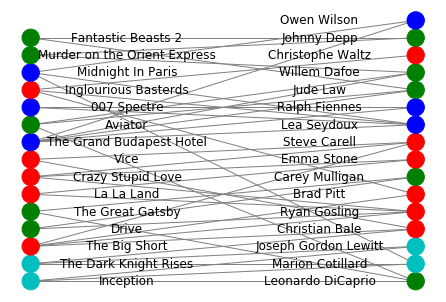

In [26]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i] % len(COLORS)] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)



